<a href="https://colab.research.google.com/github/zhuzz12/cvdl/blob/main/DL_Lab3_SegNet_ZhuldyzayAitakhunova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd


from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/'

In [ ]:
import os 

In [ ]:
directory = '/content/drive/MyDrive/DL/fish'
train_files = []
target_files = []
fish_types = 'Black Sea Sprat'
for file in os.listdir(os.path.join(directory, fish_types)):
    train_files.append(os.path.join(directory, 'Black Sea Sprat', file))
    target_files.append(os.path.join(directory,  'Black Sea Sprat GT', file))

In [ ]:
df = pd.DataFrame({'img' : train_files, 'mask' : target_files})
df.head()

,img,mask
0,/content/drive/MyDrive/DL/fish/Black Sea Sprat...,/content/drive/MyDrive/DL/fish/Black Sea Sprat...
1,/content/drive/MyDrive/DL/fish/Black Sea Sprat...,/content/drive/MyDrive/DL/fish/Black Sea Sprat...
2,/content/drive/MyDrive/DL/fish/Black Sea Sprat...,/content/drive/MyDrive/DL/fish/Black Sea Sprat...
3,/content/drive/MyDrive/DL/fish/Black Sea Sprat...,/content/drive/MyDrive/DL/fish/Black Sea Sprat...
4,/content/drive/MyDrive/DL/fish/Black Sea Sprat...,/content/drive/MyDrive/DL/fish/Black Sea Sprat...


In [ ]:
df1 = pd.DataFrame()

In [ ]:
from tqdm import tqdm

In [ ]:
(df['img'][0])

'/content/drive/MyDrive/DL/fish/Black Sea Sprat/00001.png'

In [ ]:
img = []
for ind in tqdm(range(len(df['img']))):
    origImage = cv2.imread(df['img'][ind])
    #origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    img.append(origImage)
df1['img'] = img

100%|██████████| 1000/1000 [00:12<00:00, 82.31it/s]


In [ ]:
(df['mask'][0])

'/content/drive/MyDrive/DL/fish/Black Sea Sprat GT/00001.png'

In [ ]:
mask = []
for ind in tqdm(range(len(df['mask']))):
    origImage = cv2.imread(df['mask'][ind])
    #print(origImage)
    origImage = cv2.cvtColor(origImage, cv2.COLOR_BGR2GRAY, )
    origImage = (origImage ) 
    mask.append(origImage**2)
df1['mask'] = mask

100%|██████████| 1000/1000 [00:03<00:00, 322.03it/s]


In [ ]:
df1.head()

,img,mask
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
def keras_generator(gen_df, batch_size):
    while True:
        x_batch = []
        y_batch = []
        
        for i in range(batch_size):
            img, mask = gen_df.sample(1).values[0]
            
            img = cv2.resize(img, (256, 256))
            mask = cv2.resize(mask, (256, 256))
            mask =( mask > 0) **2
            
            x_batch += [img]
            y_batch += [mask]

        x_batch = np.array(x_batch) / 255.
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [ ]:
for x, y in keras_generator(df1, 16):
    break

In [ ]:
x.shape

(16, 256, 256, 3)

In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation
from keras.layers import Input, Dense

inp = Input(shape=(256, 256, 3))

conv_1_1 = Conv2D(32, (3, 3), padding='same')(inp)
conv_1_1 = Activation('relu')(conv_1_1)

conv_1_2 = Conv2D(32, (3, 3), padding='same')(conv_1_1)
conv_1_2 = Activation('relu')(conv_1_2)

pool_1 = MaxPooling2D(2)(conv_1_2)


conv_2_1 = Conv2D(64, (3, 3), padding='same')(pool_1)
conv_2_1 = Activation('relu')(conv_2_1)

conv_2_2 = Conv2D(64, (3, 3), padding='same')(conv_2_1)
conv_2_2 = Activation('relu')(conv_2_2)

pool_2 = MaxPooling2D(2)(conv_2_2)


conv_3_1 = Conv2D(128, (3, 3), padding='same')(pool_2)
conv_3_1 = Activation('relu')(conv_3_1)

conv_3_2 = Conv2D(128, (3, 3), padding='same')(conv_3_1)
conv_3_2 = Activation('relu')(conv_3_2)

pool_3 = MaxPooling2D(2)(conv_3_2)


conv_4_1 = Conv2D(256, (3, 3), padding='same')(pool_3)
conv_4_1 = Activation('relu')(conv_4_1)

conv_4_2 = Conv2D(256, (3, 3), padding='same')(conv_4_1)
conv_4_2 = Activation('relu')(conv_4_2)

pool_4 = MaxPooling2D(2)(conv_4_2)

up_1 = UpSampling2D(2, interpolation='bilinear')(pool_4)
conv_up_1_1 = Conv2D(256, (3, 3), padding='same')(up_1)
conv_up_1_1 = Activation('relu')(conv_up_1_1)

conv_up_1_2 = Conv2D(256, (3, 3), padding='same')(conv_up_1_1)
conv_up_1_2 = Activation('relu')(conv_up_1_2)


up_2 = UpSampling2D(2, interpolation='bilinear')(conv_up_1_2)
conv_up_2_1 = Conv2D(128, (3, 3), padding='same')(up_2)
conv_up_2_1 = Activation('relu')(conv_up_2_1)

conv_up_2_2 = Conv2D(128, (3, 3), padding='same')(conv_up_2_1)
conv_up_2_2 = Activation('relu')(conv_up_2_2)


up_3 = UpSampling2D(2, interpolation='bilinear')(conv_up_2_2)
conv_up_3_1 = Conv2D(64, (3, 3), padding='same')(up_3)
conv_up_3_1 = Activation('relu')(conv_up_3_1)

conv_up_3_2 = Conv2D(64, (3, 3), padding='same')(conv_up_3_1)
conv_up_3_2 = Activation('relu')(conv_up_3_2)



up_4 = UpSampling2D(2, interpolation='bilinear')(conv_up_3_2)
conv_up_4_1 = Conv2D(32, (3, 3), padding='same')(up_4)
conv_up_4_1 = Activation('relu')(conv_up_4_1)

conv_up_4_2 = Conv2D(1, (3, 3), padding='same')(conv_up_4_1)
result = Activation('sigmoid')(conv_up_4_2)


model = Model(inputs=inp, outputs=result)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_64 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 activation_64 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 conv2d_65 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 activation_65 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                           

In [ ]:
from tensorflow import keras

In [ ]:
best_w = keras.callbacks.ModelCheckpoint('fcn_best.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=True,
                                save_weights_only=True,
                                mode='auto',
                                period=1)

last_w = keras.callbacks.ModelCheckpoint('fcn_last.h5',
                                monitor='val_loss',
                                verbose=0,
                                save_best_only=False,
                                save_weights_only=True,
                                mode='auto',
                                period=1)


callbacks = [best_w, last_w]



adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


model.compile(adam, 'binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
df_train, df_val = train_test_split(df1, test_size=0.2, random_state=12)


In [ ]:
#df_train = df1

In [ ]:
df_train.shape

(800, 2)

In [ ]:
df_val.shape

(200, 2)

In [ ]:
batch_size = 16
history = model.fit(keras_generator(df_train, batch_size),
              steps_per_epoch=100,
              epochs=5,
              verbose=1,
              callbacks=callbacks,
              validation_data=keras_generator(df_val, batch_size),
              validation_steps=50,
              class_weight=None,
              max_queue_size=10,
              workers=1,
              use_multiprocessing=False,
              shuffle=True,
              initial_epoch=0)

Epoch 1/5
100/100 [==============================] - 28s 267ms/step - loss: 0.2954 - val_loss: 0.1190
Epoch 2/5
100/100 [==============================] - 27s 274ms/step - loss: 0.0935 - val_loss: 0.0568
Epoch 3/5
100/100 [==============================] - 27s 274ms/step - loss: 0.0612 - val_loss: 0.0542
Epoch 4/5
100/100 [==============================] - 27s 275ms/step - loss: 0.0562 - val_loss: 0.0443
Epoch 5/5
100/100 [==============================] - 27s 272ms/step - loss: 0.0516 - val_loss: 0.0575


In [ ]:
img_test = []
mask_test = []
for img, mask in keras_generator(df_val, df_val.shape[0]):
    img_test = img
    mask_test = mask
    break

pred = model.predict(img_test)

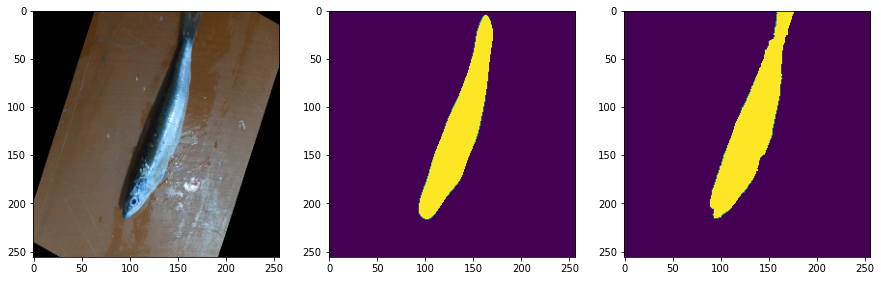

In [ ]:
im_id = 2
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
axes[0].imshow(img_test[im_id])
axes[1].imshow(pred[im_id, ..., 0] > 0.5)
axes[2].imshow(mask_test[im_id, ..., 0])
plt.show()

In [ ]:
pred_round = np.round(pred)
pred_pixels = pred_round.reshape(pred.shape[0], -1).sum(axis = 1)

intersection = np.multiply(pred_round, mask_test).reshape(pred.shape[0], -1)
intersection = intersection.sum(axis = 1)

mask_pixels = mask_test.reshape(mask_test.shape[0], -1)
mask_pixels = mask_pixels.sum(axis = 1)

dice = 2*intersection/(mask_pixels+pred_pixels)
print("Dice: ", dice.mean())


Dice:  0.8918817448263723


array([3984., 5079., 5212., 6815., 4174., 5519., 7960., 6876., 6698.,
       6673., 5888., 3918., 5971., 6028., 5309., 5601., 4415., 4311.,
       3916., 3979., 5456., 6116., 5381., 4239., 9412., 7636., 4174.,
       9412., 7567., 4760., 5985., 6164., 3866., 5410., 5443., 5381.,
       5345., 5220., 4857., 5257., 7282., 4174., 6873., 2623., 5460.,
       9767., 5220., 5519., 6760., 5079., 7282., 6175., 6617., 5389.,
       5116., 6174., 5500., 6272., 7642., 6324., 7408., 3973., 5653.,
       2350., 5426., 4239., 5984., 3916., 5644., 3945., 5389., 6272.,
       6673., 3883., 3866., 2608., 3887., 5408., 6876., 5918., 3904.,
       6164., 2350., 5621., 5454., 5644., 6298., 5454., 7636., 3950.,
       5079., 5123., 5145., 6138., 4162., 7369., 6138., 5212., 5905.,
       7282., 6203., 7636., 7073., 3950., 6174., 6248., 6695., 3941.,
       6865., 7305., 7636., 5079., 5905., 5451., 6695., 5719., 5924.,
       5846., 5344., 3888., 6315., 5125., 4231., 2608., 5249., 3895.,
       3973., 3887.,